# Read the data 

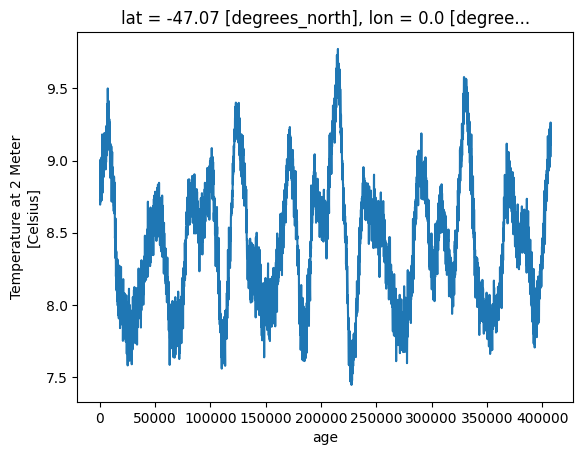

In [1]:
import xarray as xr

# import .nc data
ds = xr.open_dataset('D:/VScode/Last_deglaciation/loveclim_data/loveclim_se_fixed_ghg_atm.nc')

ds
# rename the TREFHT to sat
ds = ds.rename({'t2m': 'sat'})
# rename the time to age
ds = ds.rename({'mtime': 'age'})
# # multiply age by 1000
ds['age'] = ds['age'] * 1000

ds

# # # convert the sat to degrees C
# # ds['sat'] = ds['sat'] - 273.15

ds = ds[['sat']]
ds

# plot a record from the ds_sat at given lat and lon
ds['sat'].isel(lat=7, lon=0).plot()

ds_sat=ds



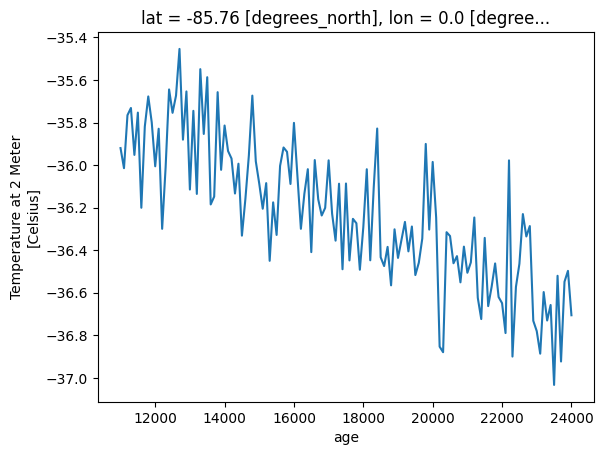

In [2]:
ds_sat = ds_sat.sel(age=slice(24000, 11000))
ds_sat['sat'].isel(lat=0, lon=0).plot()

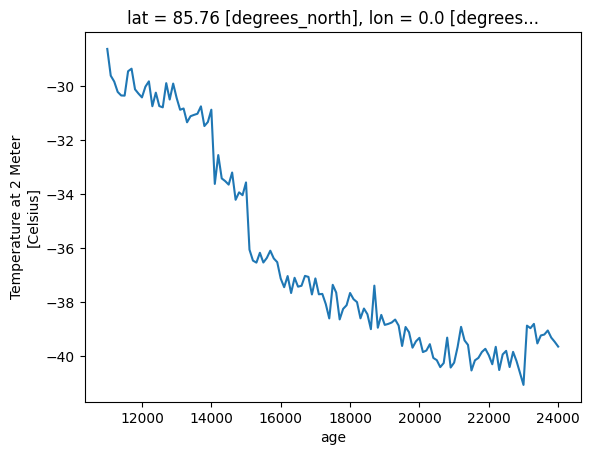

In [3]:
ds_sat = ds_sat.sel(age=slice(24000, 11000))
ds_sat['sat'].isel(lat=-1, lon=0).plot()

# PCA

shape of the weight: (32,)
shape of the reshaped sat_centered_weighted: (131, 2048)


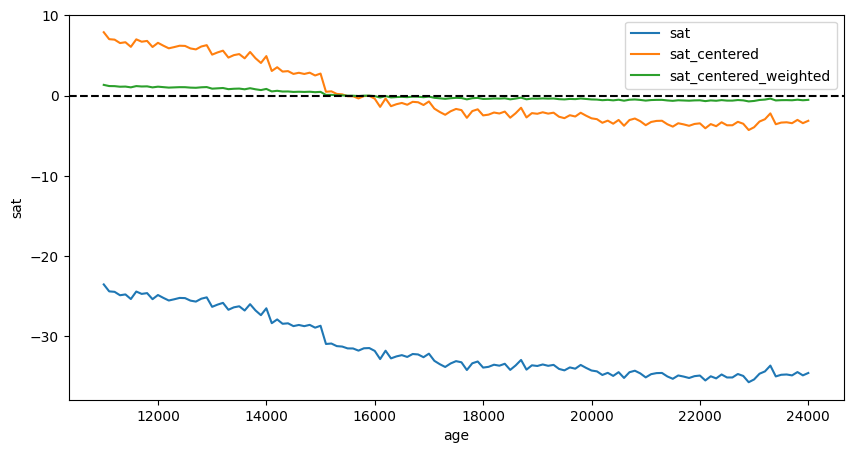

In [4]:
from toolbox import PCA_functions as pf
# 1. Center the Data
ds_sat = pf.center_data(ds_sat)

# 2. Weight the Data
ds_sat = pf.apply_weighting(ds_sat)

# 3. Plot the Centered and Weighted Data
# Assuming you want to plot data for lat=0 and lon=0
lat_index = 30
lon_index = 50
pf.plot_sat_variables(ds_sat, lat_index, lon_index)


In [5]:
from toolbox import PCA_functions as pf
# 4. Perform PCA
exp_variance, eofs, pcs = pf.sat_PCA(ds_sat)
print('Explained variance:', exp_variance)


shape of the reshaped sat_centered_weighted: (2048, 131)
shape of u, s, vh: (2048, 2048) (131,) (131, 131)
shape of EOFs: (2048, 2)
shape of PCs: (131, 2)
Explained variance: [8.95172179e-01 3.03398818e-02 1.90853663e-02 1.09819239e-02
 6.37555029e-03 4.98378277e-03 3.28197470e-03 3.18235485e-03
 2.35984032e-03 1.83261011e-03 1.73453207e-03 1.59718213e-03
 1.41081796e-03 1.29017781e-03 1.03473617e-03 9.79650882e-04
 8.67414405e-04 8.31229729e-04 7.18043360e-04 6.42899773e-04
 6.02128392e-04 5.39174071e-04 4.96082474e-04 4.47137078e-04
 4.33147012e-04 3.80999030e-04 3.62360326e-04 3.29429167e-04
 3.22855747e-04 3.03033070e-04 2.78130436e-04 2.68645876e-04
 2.61374167e-04 2.45664589e-04 2.37164539e-04 2.27266486e-04
 2.14271917e-04 2.10601793e-04 2.03888572e-04 1.91936939e-04
 1.88391321e-04 1.79125782e-04 1.62612254e-04 1.56384805e-04
 1.46505801e-04 1.43748854e-04 1.34620233e-04 1.28641812e-04
 1.28096624e-04 1.24708589e-04 1.18841599e-04 1.16369330e-04
 1.11618188e-04 1.07043626e-04 1

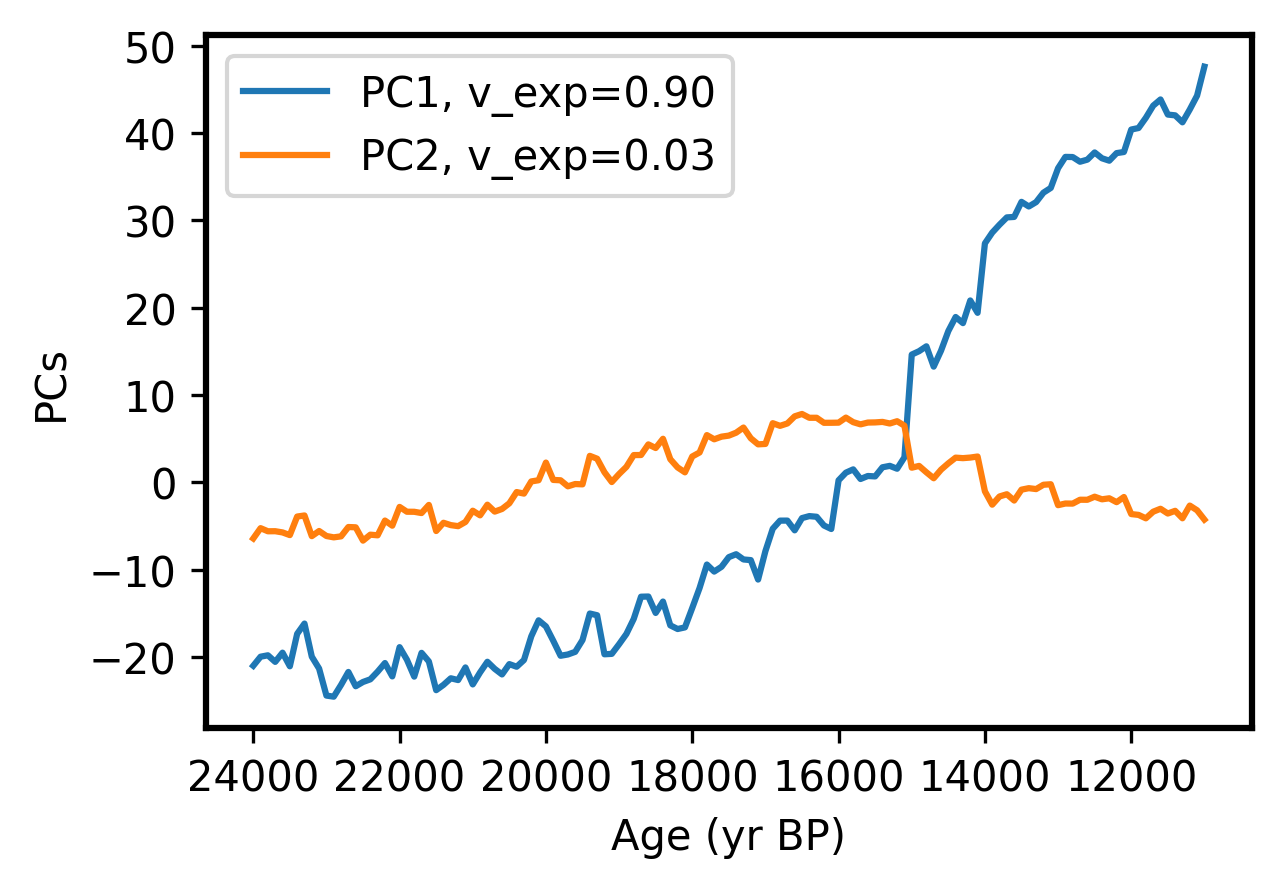

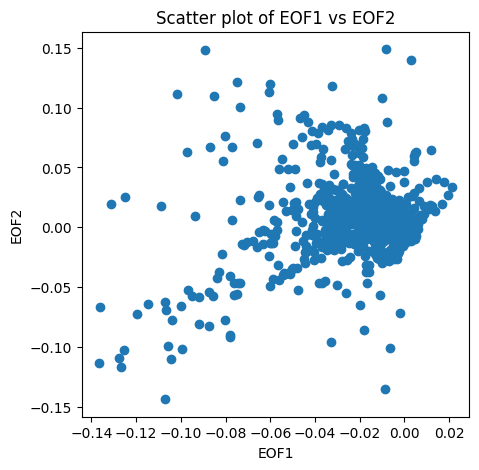

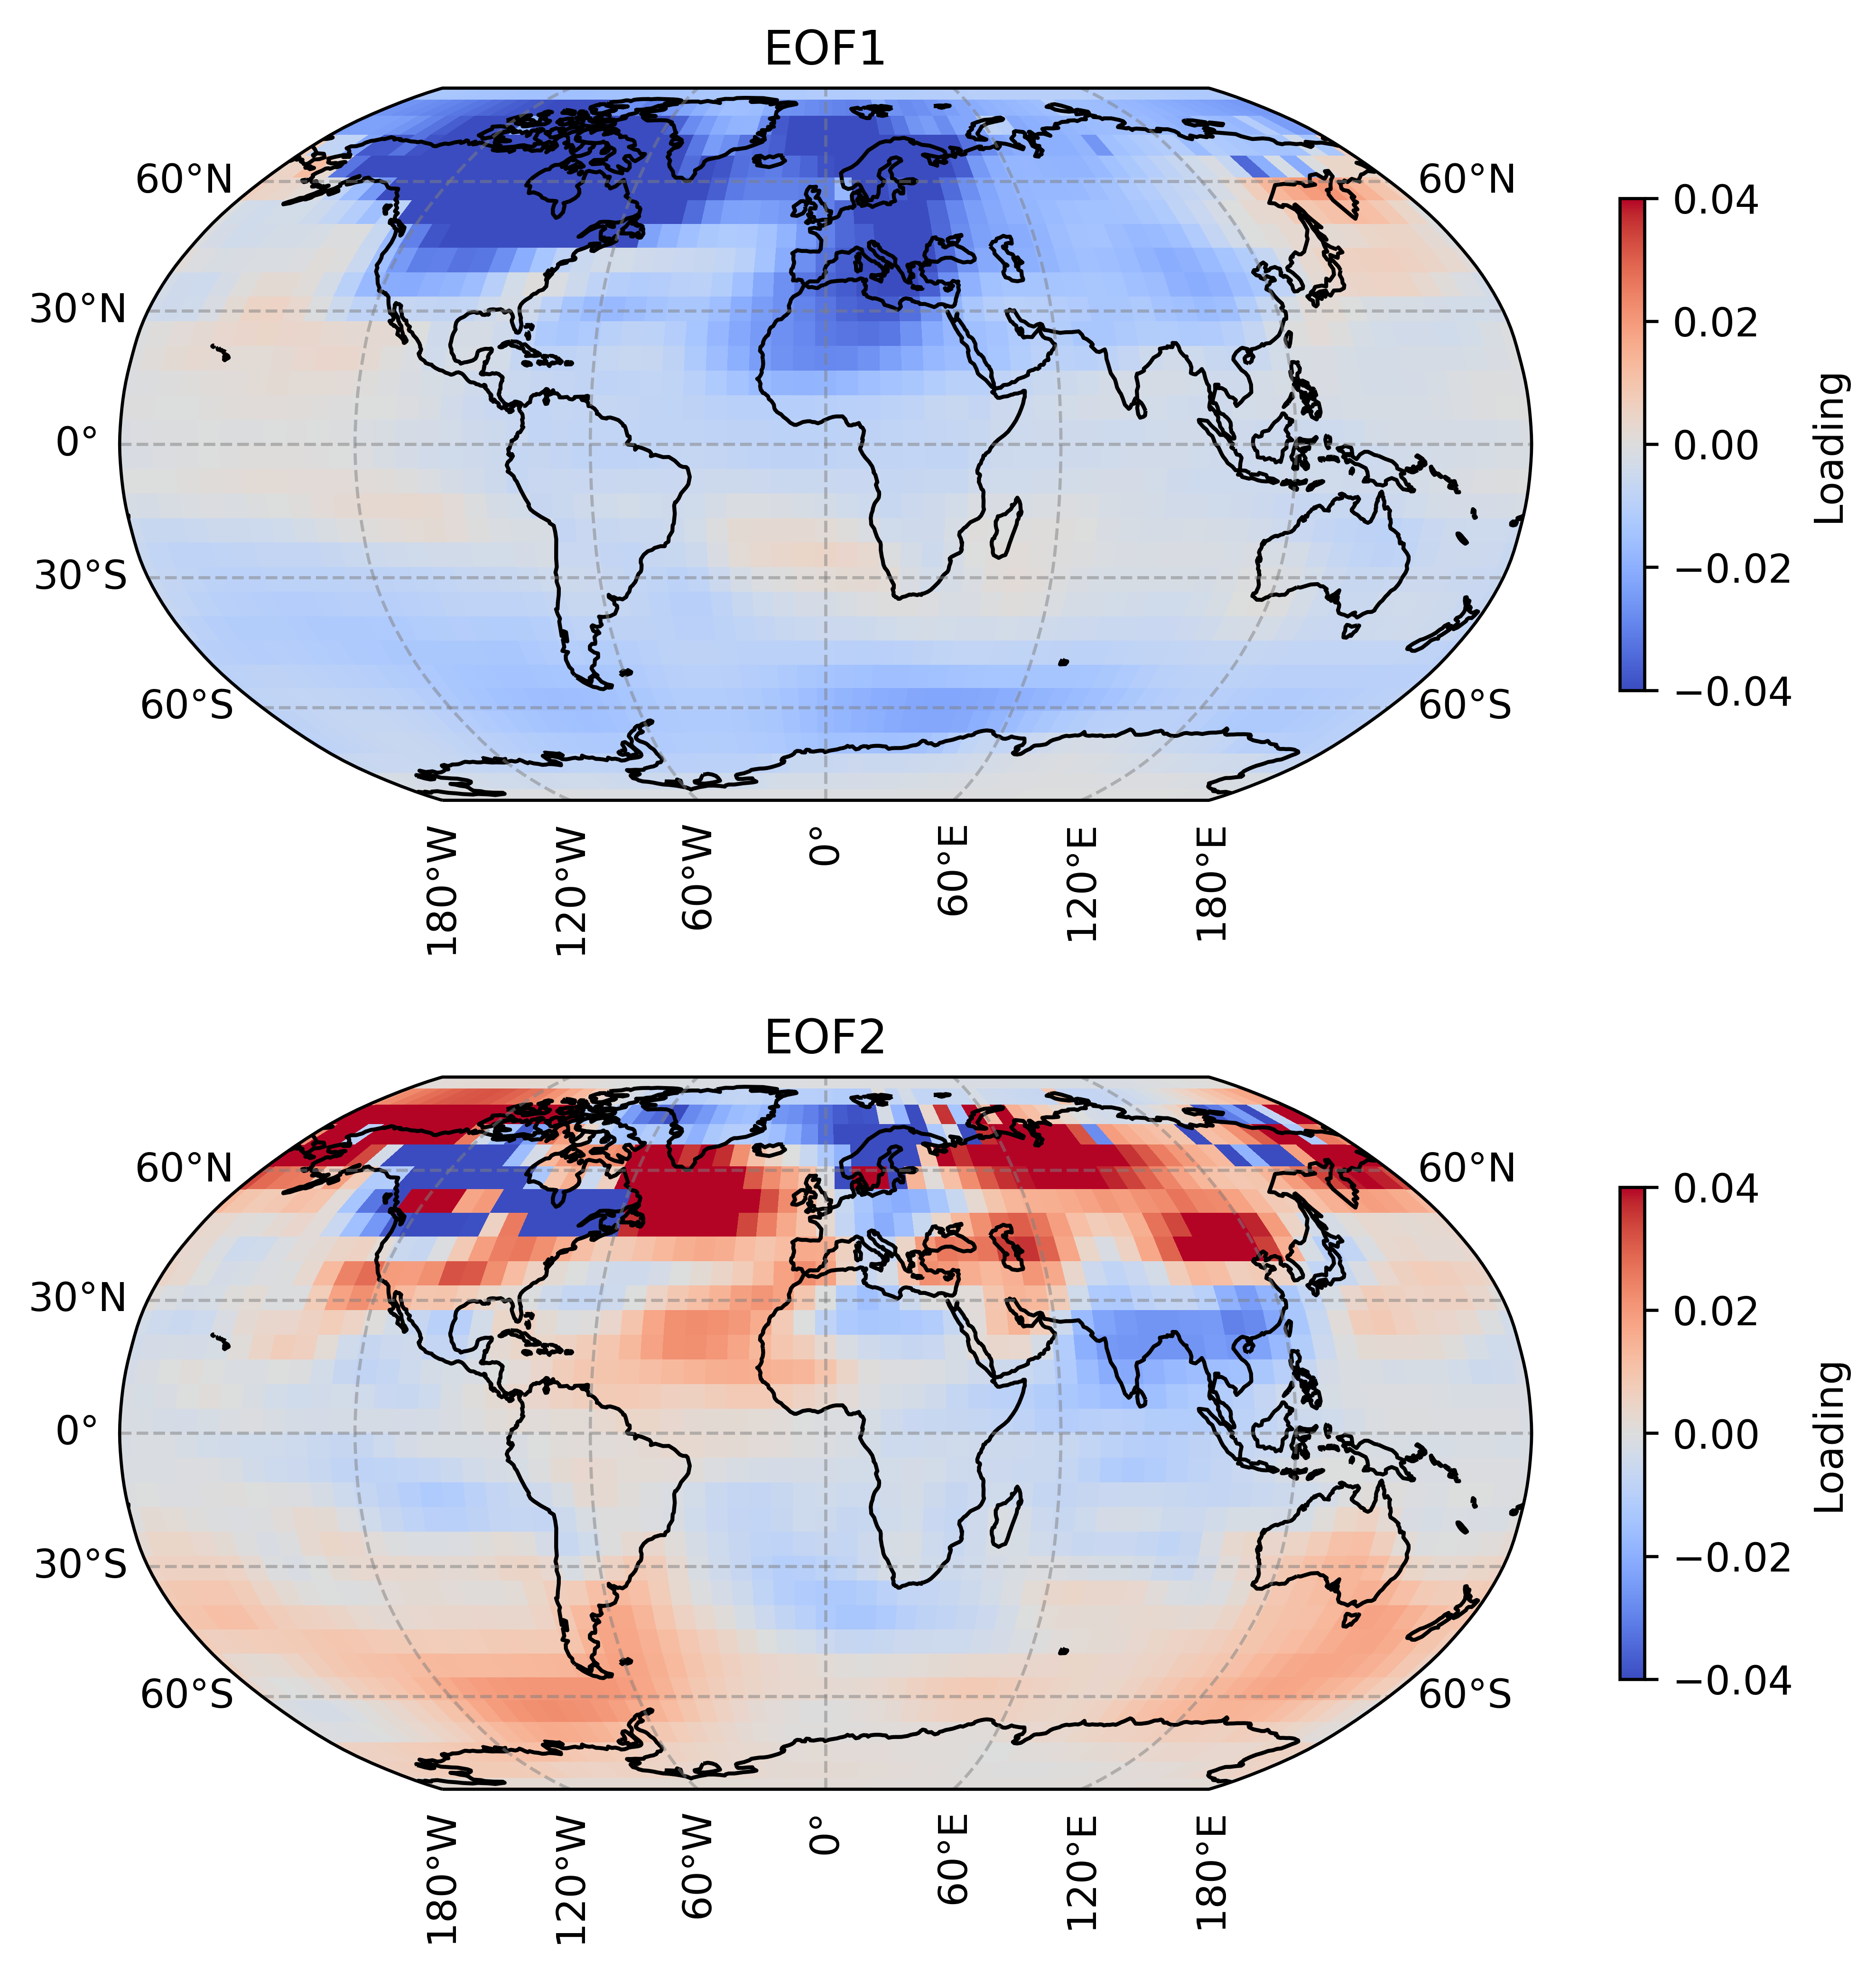

(<Figure size 4800x5400 with 4 Axes>,
 array([<GeoAxesSubplot: title={'center': 'EOF1'}>,
        <GeoAxesSubplot: title={'center': 'EOF2'}>], dtype=object))

In [6]:
# 5. Plot PCs
pf.plot_pcs(ds_sat['age'].values, pcs, exp_variance)

# 6. Plot EOF Scatter
pf.plot_eof_scatter(eofs)

# 7. Plot the EOF Map
pf.plot_eof_map(eofs, ds_sat['lat'].values, ds_sat['lon'].values)

# GMM

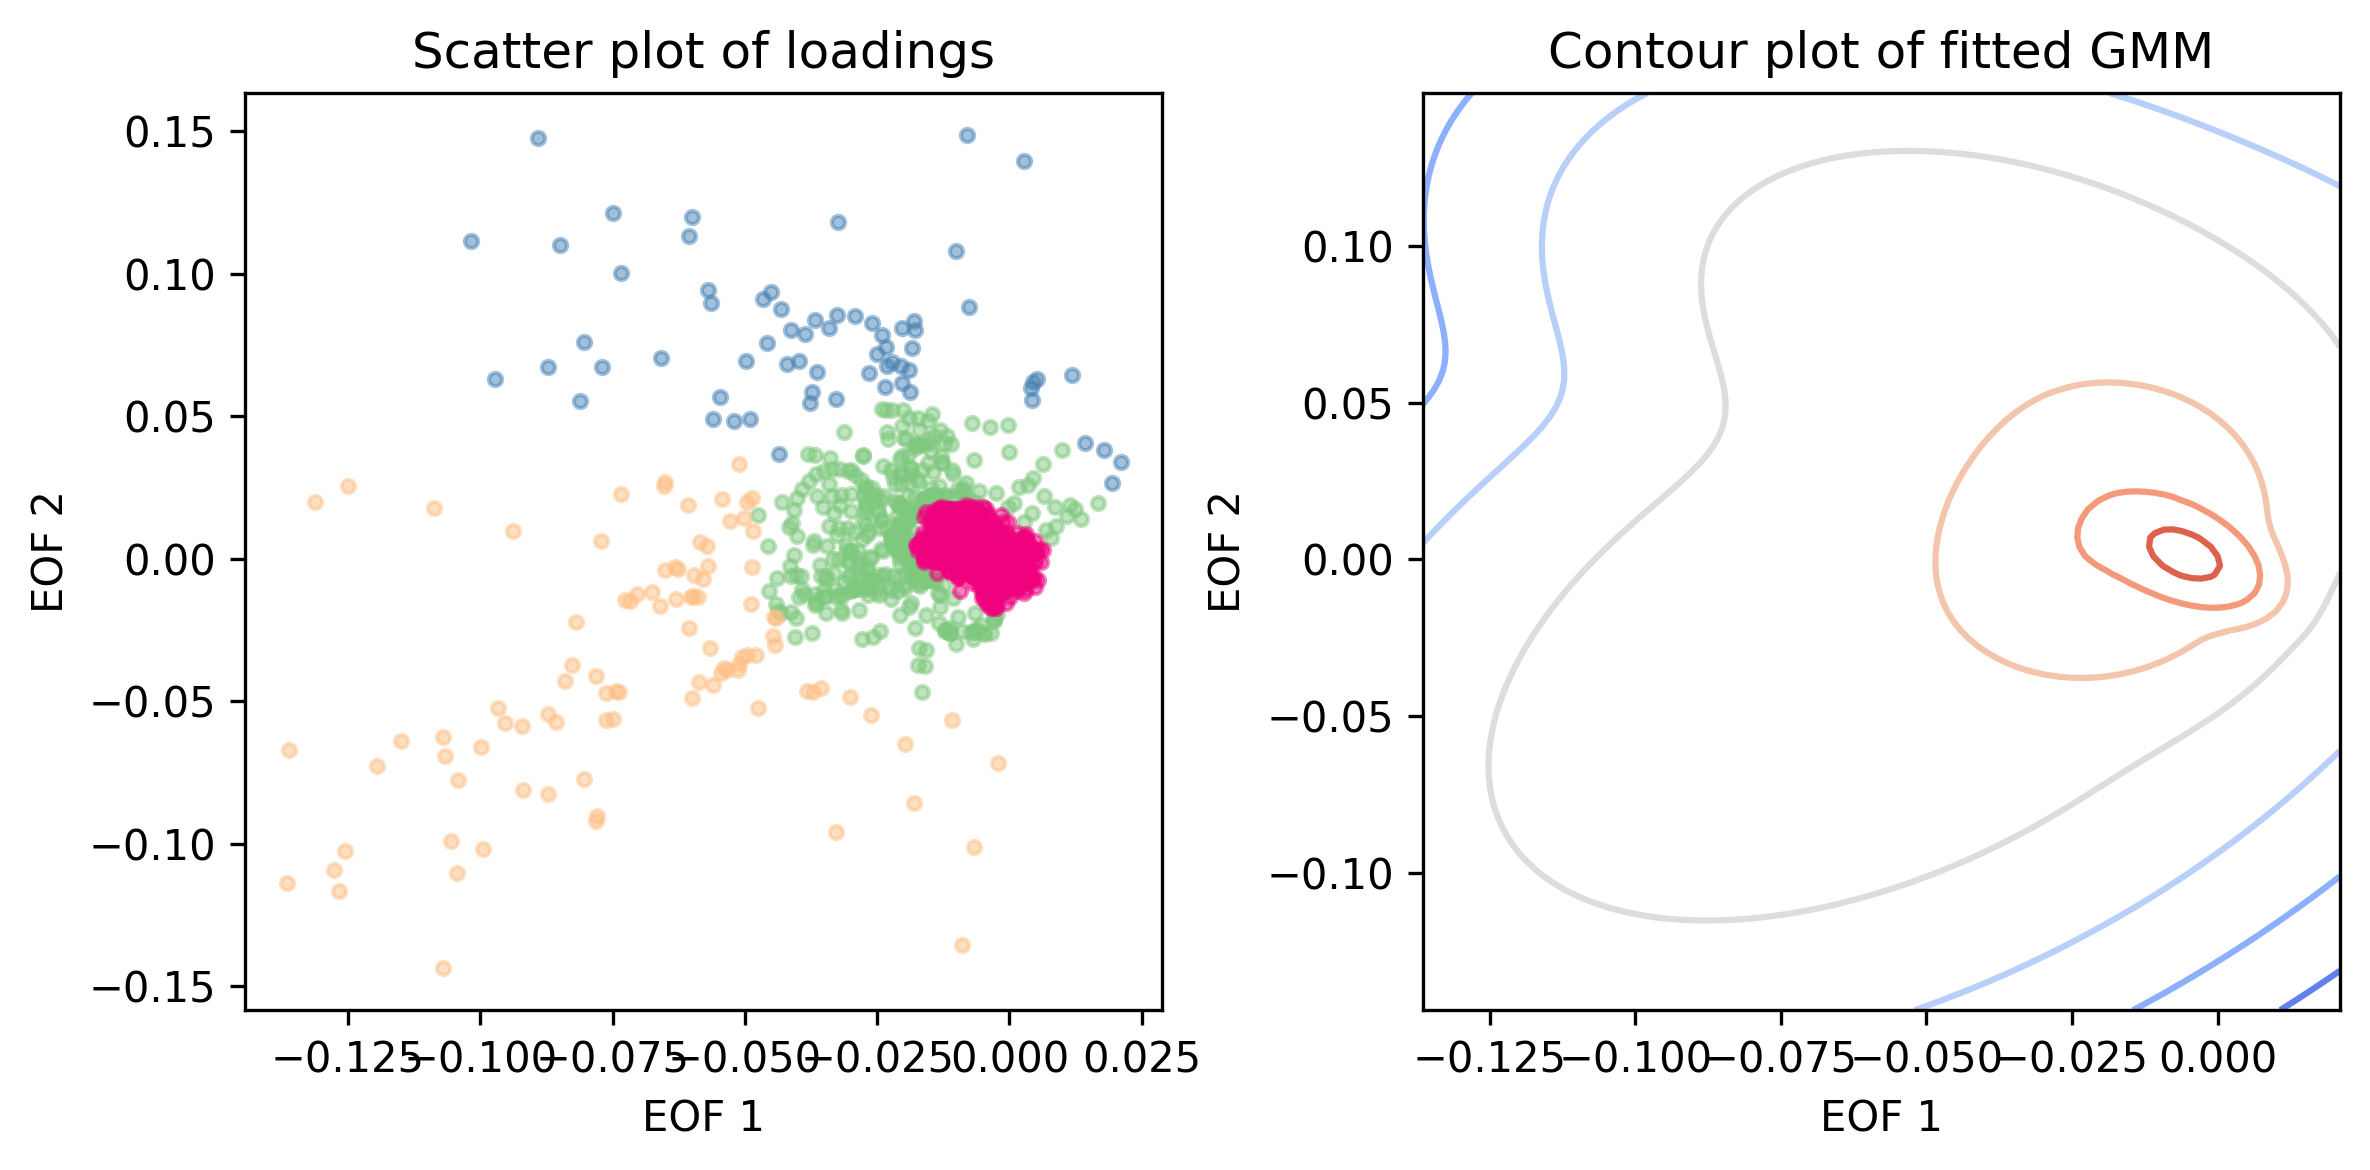

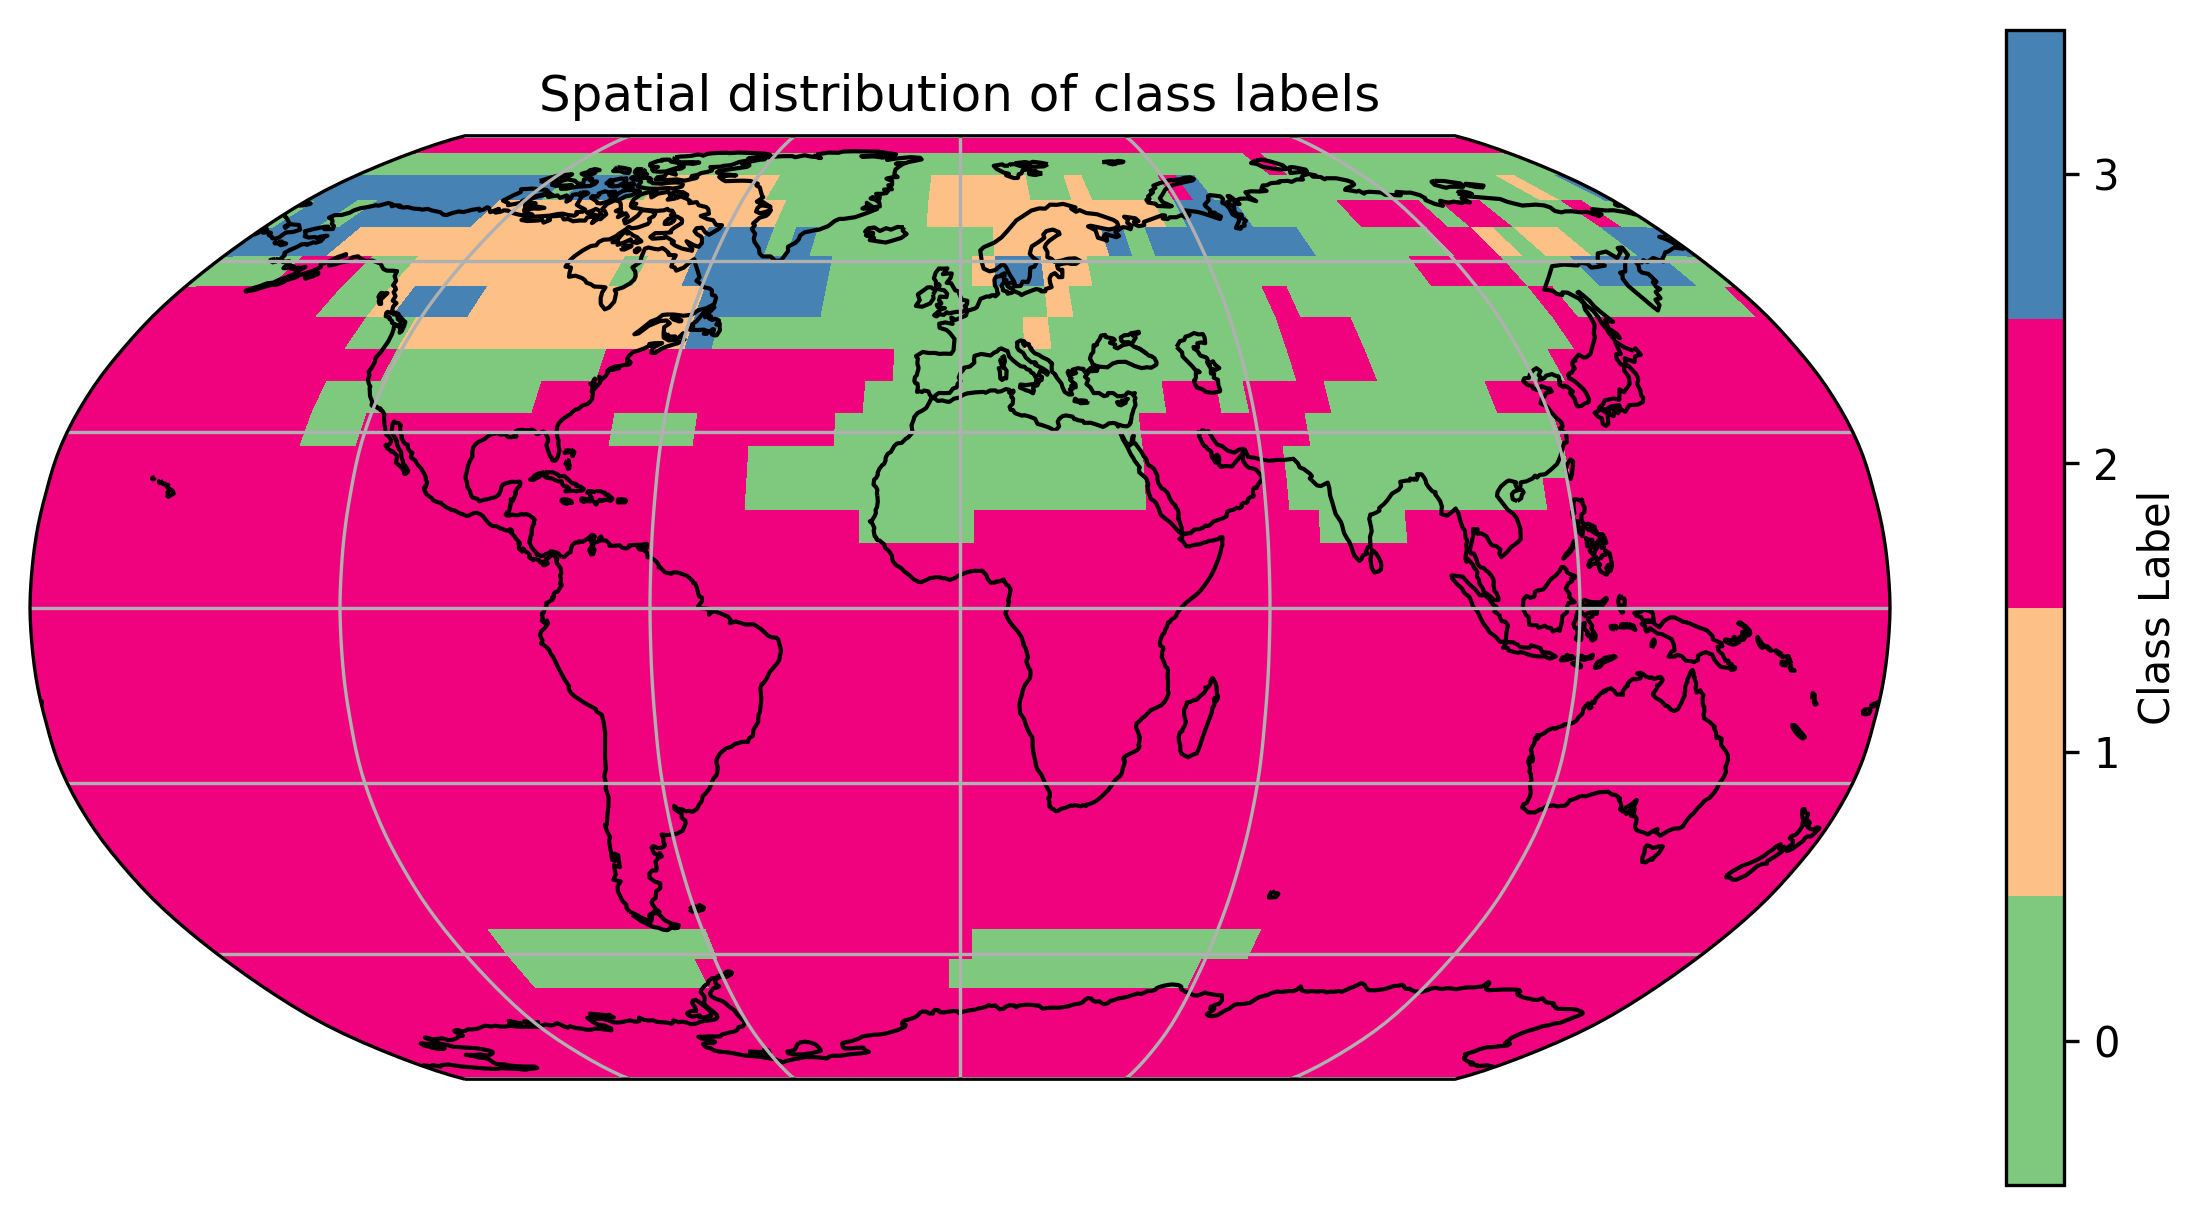

In [7]:
from toolbox import GMM_functions as gf
import importlib
importlib.reload(gf)

ds_loveclim_EOFs_GMM,reshaped_probs=gf.GMM4EOFS(eofs, ds_sat,n_components=4,init_params='kmeans')
gf.plot_labels(ds_loveclim_EOFs_GMM)

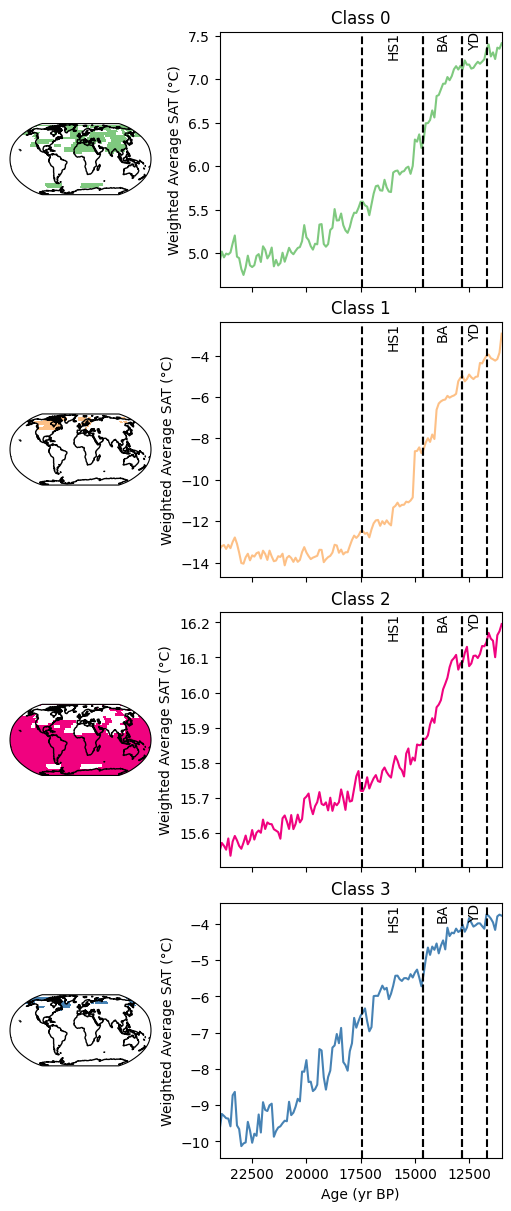

In [8]:
from toolbox import GMM_functions as gf
import importlib
importlib.reload(gf) 

uncor_weighted_avg=gf.plot_weighted_average_curve(ds_loveclim_EOFs_GMM.copy(), dpi=100)